# Bolidozor FITS CRVAL2 and SYSDATE1 plotter

For use of this notebook you must have mounted space.astro.cz storage server to local filesystem. It is possible to do with `sshfs`
```bash
  sshfs <user>@space.astro.cz /<mnt folder>
```
Then you must set path of `<mnt foler>` to `path` variable.

Script works only with files with `SYSDATE1` parameter in header.

In [153]:
import os
import datetime
import numpy
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline  

In [155]:
path = '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/'
times = numpy.ndarray((0,2))
start_time = datetime.datetime.now()
 
for root, dirs, files in os.walk(path):
    print("")
    print(root, " ")
    for name in files:
        if name.endswith(("snap.fits")):
            hdulist = fits.open(os.path.join(root, name))
            sysdate = hdulist[1].header['SYSDATE1']
            crval = hdulist[1].header['CRVAL2']
            time = [sysdate, crval]
            times = numpy.vstack( [times, time]  )
            hdulist.close()
            print("+", end='')
times.sort(axis=0)
print("")
print("===================================")
print("It takes", datetime.datetime.now()-start_time, "seconds.")



/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/11  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/08  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/02  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/05  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/16  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/18  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/sto

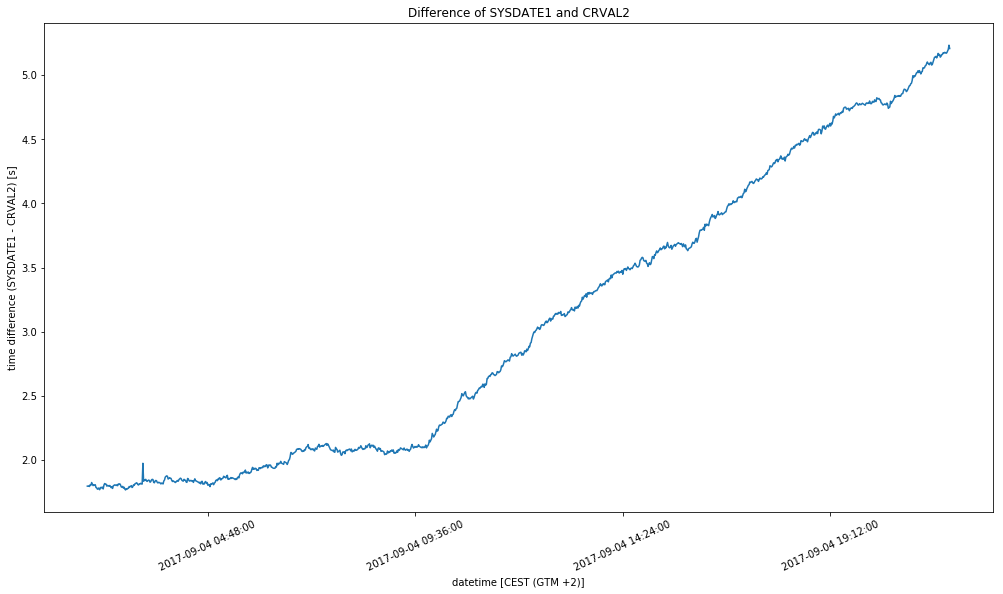

In [162]:
plt.figure(figsize=(17, 9))

data=md.date2num([datetime.datetime.fromtimestamp(ts) for ts in times[:,0]/1000])
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_title('Difference of SYSDATE1 and CRVAL2 ti')
ax.set_xlabel('datetime [CEST (GTM +2)]')
ax.set_ylabel('time difference (SYSDATE1 - CRVAL2) [s]')

plt.plot(data, (times[:,0]-times[:,1])/1000.0 - 60)
plt.show()